# Striatum In Rat


The Striatum is a nucleus cluster in the subcortical basa ganglia of the forbrain. It is a critical component of the motor and rewards stystem and coordinates multiple aspects of cognition including action planning, decision making, reward perception, etc. 

-  The striatum is divided into ventral and dorsal subdivisions. The ventral straitum is composed of the nucleus accumbens and the olfactory tubercle. The dorsal striatum is composed of caudate nucleus and the putamen. 
-  The striatum especially the ventral striatum mediates reward cognition. reinforcement, and motivational salience whereas the dorsal striatum mediates motor funcctions, certain executive functions and stimulus response learning.

In [32]:
import nibabel as nib
import os
from scipy.stats import pearsonr
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### Loading and extracting timecourse data for striatum

In [33]:
path = 'BOLD-rsfMRI_WistarRat_female_P80.nii.gz'
img = nib.load(path)

In [34]:
striatum = nib.load('striatum.nii.gz')

In [35]:
striatum.shape

(72, 72, 32)

In [36]:
img_dataobj = np.asarray(img._dataobj)

In [37]:
str_mask = np.asarray(striatum._dataobj)
left_str = (str_mask == 1)
right_str = (str_mask == 2)

left_str_indice = np.nonzero(left_str)
right_str_indice = np.nonzero(right_str)

left_str_data = img_dataobj[left_str_indice]
right_str_data = img_dataobj[right_str_indice]

str_left_signal_avg= np.mean(left_str_data, axis = 0)
str_right_signal_avg= np.mean(right_str_data, axis = 0)

### Loading and extracting timecourse data for m1

In [38]:
m1 = nib.load('BilateralM1.nii')
m1_mask = np.asarray(m1._dataobj)
left_m1 = (m1_mask == 1)
right_m1 = (m1_mask == 2)

left_m1_indice = np.nonzero(left_m1)
right_m1_indice = np.nonzero(right_m1)

left_m1_data = img_dataobj[left_m1_indice]
right_m1_data = img_dataobj[right_m1_indice]

m1_left_signal_avg= np.mean(left_m1_data, axis = 0)
m1_right_signal_avg= np.mean(right_m1_data, axis = 0)

### Plotting

In [39]:
left_str_data.shape

(8, 900)

In [40]:
right_str_data.shape

(8, 900)

Text(0.5,1,'Timecourse Data')

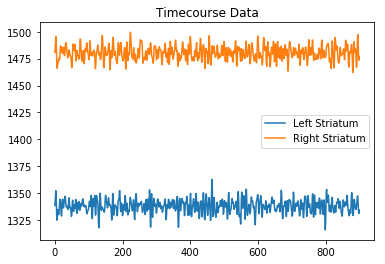

In [41]:
plot(str_left_signal_avg, label = 'Left Striatum')
plot(str_right_signal_avg, label = 'Right Striatum')
plt.legend()
plt.title('Timecourse Data')


Correlation Coefficient between left and right striatum


(0.38081104, 1.9524036030216469e-32)

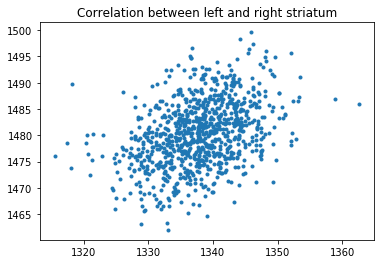

In [42]:
plot(str_left_signal_avg, str_right_signal_avg, '.')
plt.title('Correlation between left and right striatum')
print('Correlation Coefficient between left and right striatum')
pearsonr(str_left_signal_avg, str_right_signal_avg)

Correlation Coefficient between left and left M1


(0.20318736, 7.6788516717802114e-10)

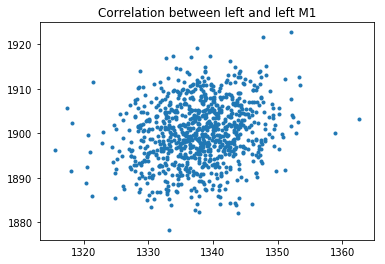

In [43]:
plot(str_left_signal_avg, m1_left_signal_avg, '.')
plt.title('Correlation between left and left M1')
print('Correlation Coefficient between left and left M1')
pearsonr(str_left_signal_avg, m1_left_signal_avg)

Correlation Coefficient between left and right M1


(0.063390911, 0.057302470179189477)

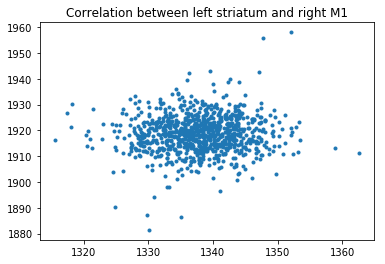

In [44]:
plot(str_left_signal_avg, m1_right_signal_avg, '.')
plt.title('Correlation between left striatum and right M1')
print('Correlation Coefficient between left and right M1')
pearsonr(str_left_signal_avg, m1_right_signal_avg)